# Female Victims. Unsolved Cases. New York 1987-1995

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('../data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [3]:
df = map_data[(map_data['VicSex'] == 'Female')
             & (map_data['Solved'] == 'No')
             & (map_data['State'] == 'New York')
             & (map_data['Year'].between(1987, 1995))]
df.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
198701006NY03030,"New York, NY",NY03030,New York,New York,Municipal police,FBI,No,1987,January,6,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,61687.0,"New York-New Jersey-Long Island, NY-NJ"
198701012NY03030,"New York, NY",NY03030,New York,New York,Municipal police,FBI,No,1987,January,12,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,61687.0,"New York-New Jersey-Long Island, NY-NJ"
198701016NY03030,"New York, NY",NY03030,New York,New York,Municipal police,FBI,No,1987,January,16,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Narcotic drug laws,NaN,0,0,61687.0,"New York-New Jersey-Long Island, NY-NJ"
198701022NY03030,"New York, NY",NY03030,New York,New York,Municipal police,FBI,No,1987,January,22,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,1,0,61687.0,"New York-New Jersey-Long Island, NY-NJ"
198701023NY03030,"New York, NY",NY03030,New York,New York,Municipal police,FBI,No,1987,January,23,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,61687.0,"New York-New Jersey-Long Island, NY-NJ"


In [4]:
df.groupby('CNTYFIPS').count()['Ori']

CNTYFIPS
Albany, NY            6
Bronx, NY             1
Cattaraugus, NY       2
Chautauqua, NY        3
Chemung, NY           1
Columbia, NY          1
Dutchess, NY          6
Erie, NY             58
Jefferson, NY         4
Madison, NY           2
Monroe, NY           52
Montgomery, NY        1
Nassau, NY           20
New York, NY       1204
Niagara, NY           3
Oneida, NY            6
Onondaga, NY          7
Orange, NY            4
Orleans, NY           2
Putnam, NY            2
Queens, NY            1
Rensselaer, NY        4
Rockland, NY          4
Saratoga, NY          3
Schenectady, NY       4
Suffolk, NY          29
Sullivan, NY          1
Tompkins, NY          2
Ulster, NY            1
Washington, NY        2
Wayne, NY             1
Westchester, NY      32
Name: Ori, dtype: int64

Text(0.5, 1.0, 'Cases by City')

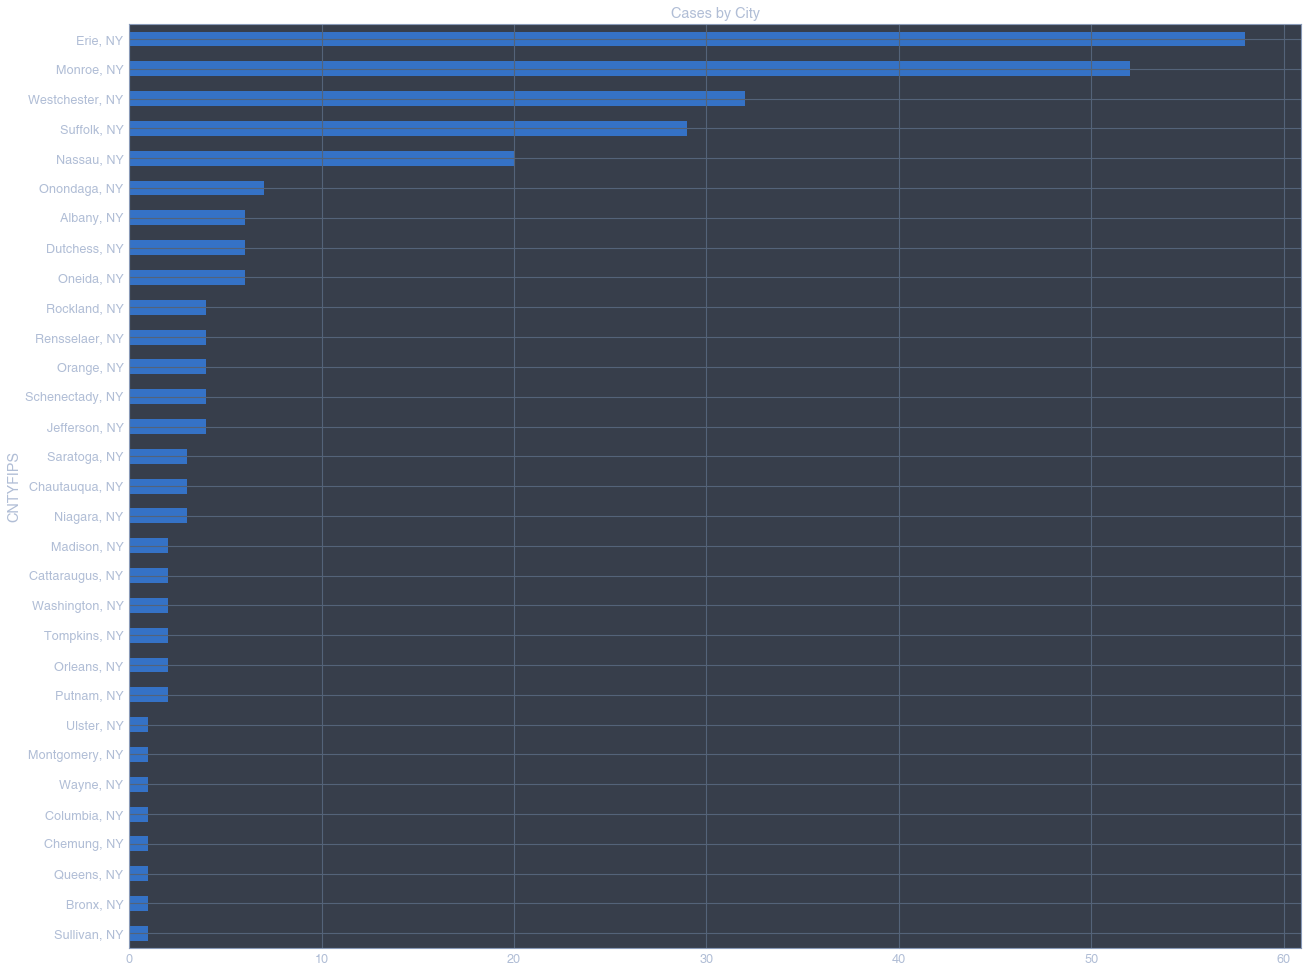

In [8]:
fig, ax = plt.subplots(figsize=(21, 17))

df[~df['CNTYFIPS'].isin(['New York, NY'])].groupby('CNTYFIPS')\
                                        .count()\
                                        .sort_values(by='Ori', ascending=True)['Ori']\
                                        .plot(kind='barh', ax=ax)
ax.set_title('Cases by City')

Text(0.5, 1.0, 'Cases by Victims Age')

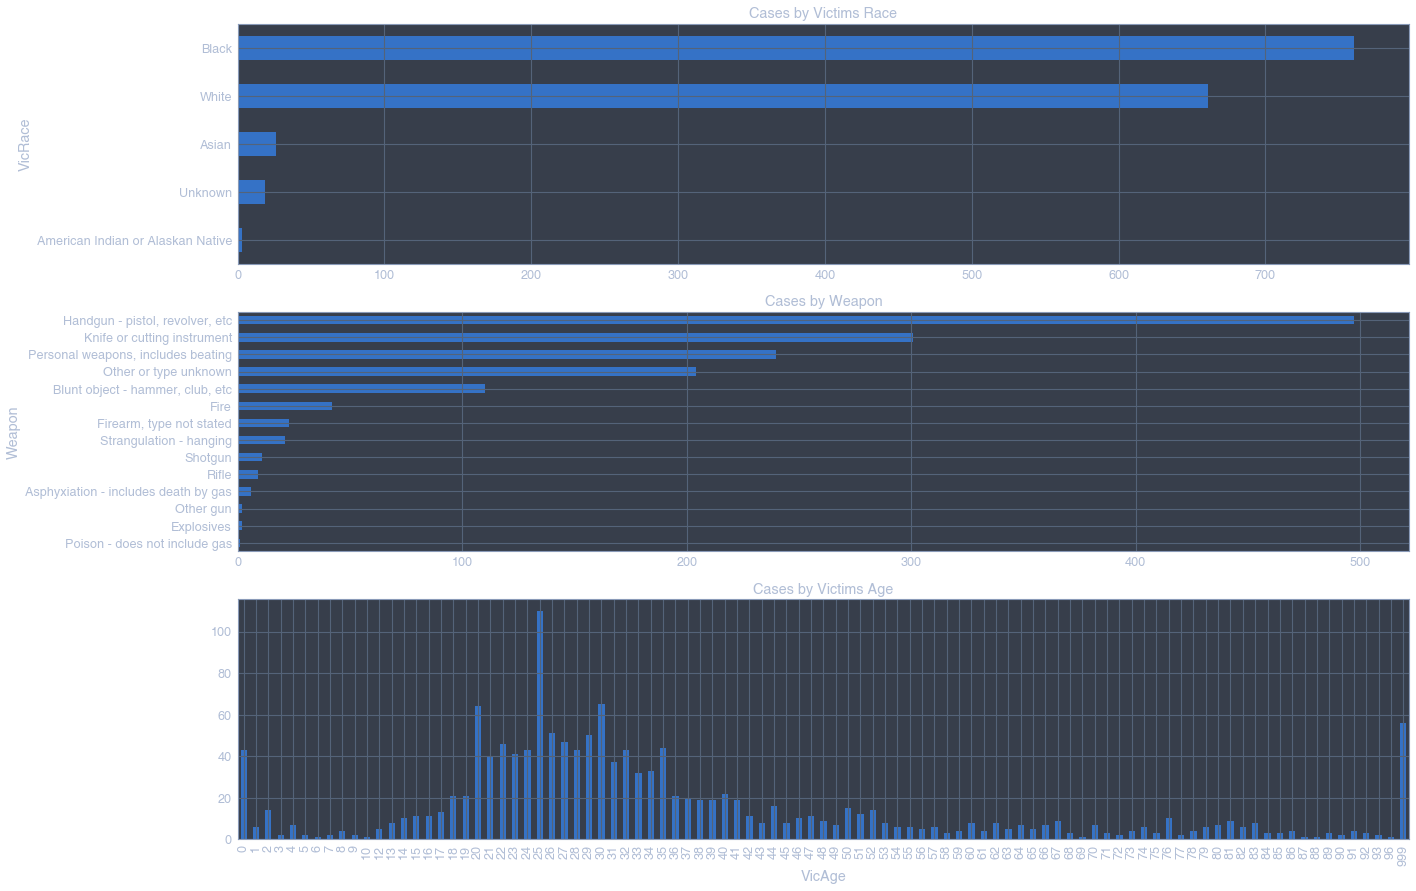

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(21, 15))

df.groupby('VicRace').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[0])
ax[0].set_title('Cases by Victims Race')

df.groupby('Weapon').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[1])
ax[1].set_title('Cases by Weapon')

df.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[2])
ax[2].set_title('Cases by Victims Age')

In [7]:
not_in_ny = df[~df['CNTYFIPS'].isin(['New York, NY'])]
in_ny = df[df['CNTYFIPS']=='New York, NY']

Text(0.5, 1.0, 'Cases by Victims Age. In NY')

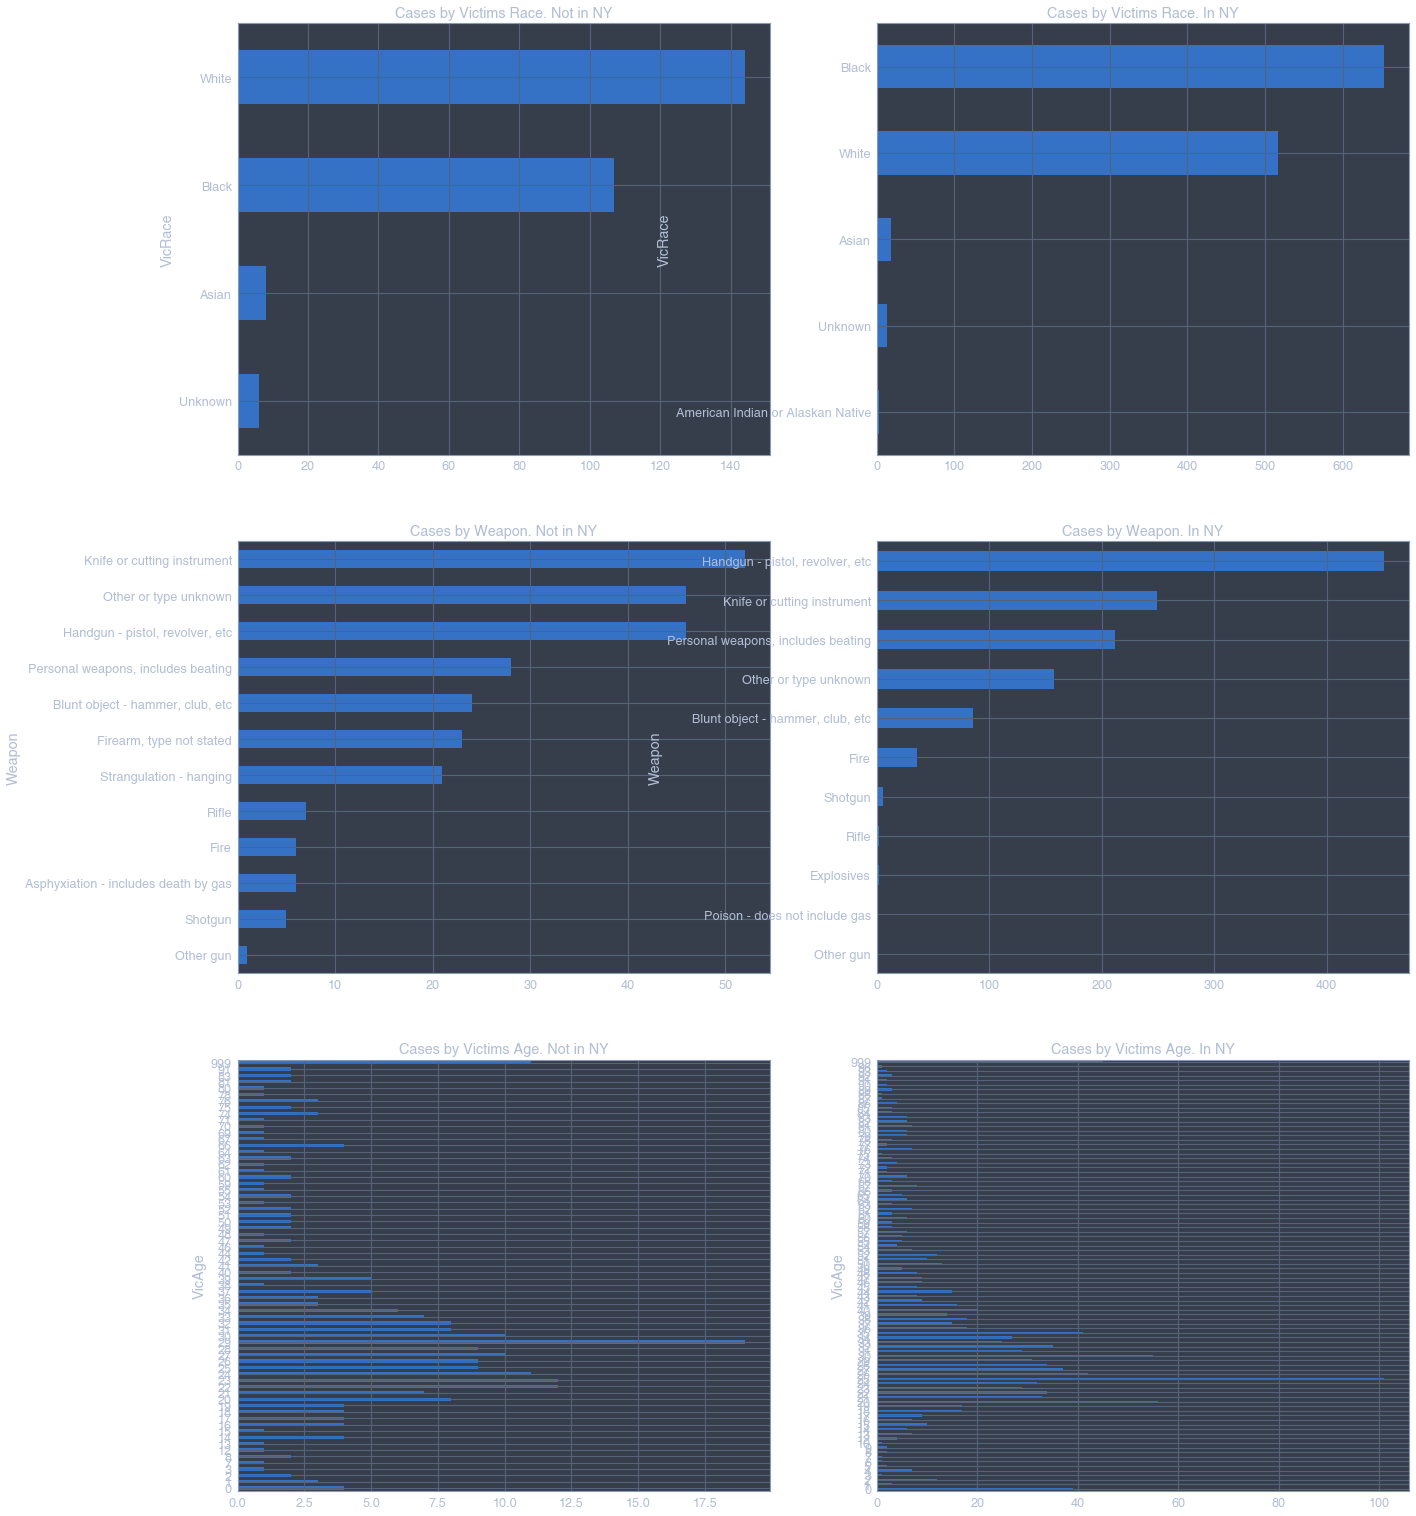

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(21, 27))

not_in_ny.groupby('VicRace').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Cases by Victims Race. Not in NY')
in_ny.groupby('VicRace').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Cases by Victims Race. In NY')

not_in_ny.groupby('Weapon').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[1, 0])
ax[1, 0].set_title('Cases by Weapon. Not in NY')
in_ny.groupby('Weapon').count().sort_values(by='Ori', ascending=True)['Ori'].plot(kind='barh', ax=ax[1, 1])
ax[1, 1].set_title('Cases by Weapon. In NY')

not_in_ny.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[2, 0])
ax[2, 0].set_title('Cases by Victims Age. Not in NY')
in_ny.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[2, 1])
ax[2, 1].set_title('Cases by Victims Age. In NY')

In [16]:
erie = df[df['CNTYFIPS'] == 'Erie, NY']                 # population: 950_312
monroe = df[df['CNTYFIPS'] == 'Monroe, NY']             # population: 21_387
nassau = df[df['CNTYFIPS'] == 'Nassau, NY']             # population: 1_088
suffolk = df[df['CNTYFIPS'] == 'Suffolk, NY']           # population: 1_525_000
westchester = df[df['CNTYFIPS'] == 'Westchester, NY']   # population: 949_113

<AxesSubplot:ylabel='Weapon'>

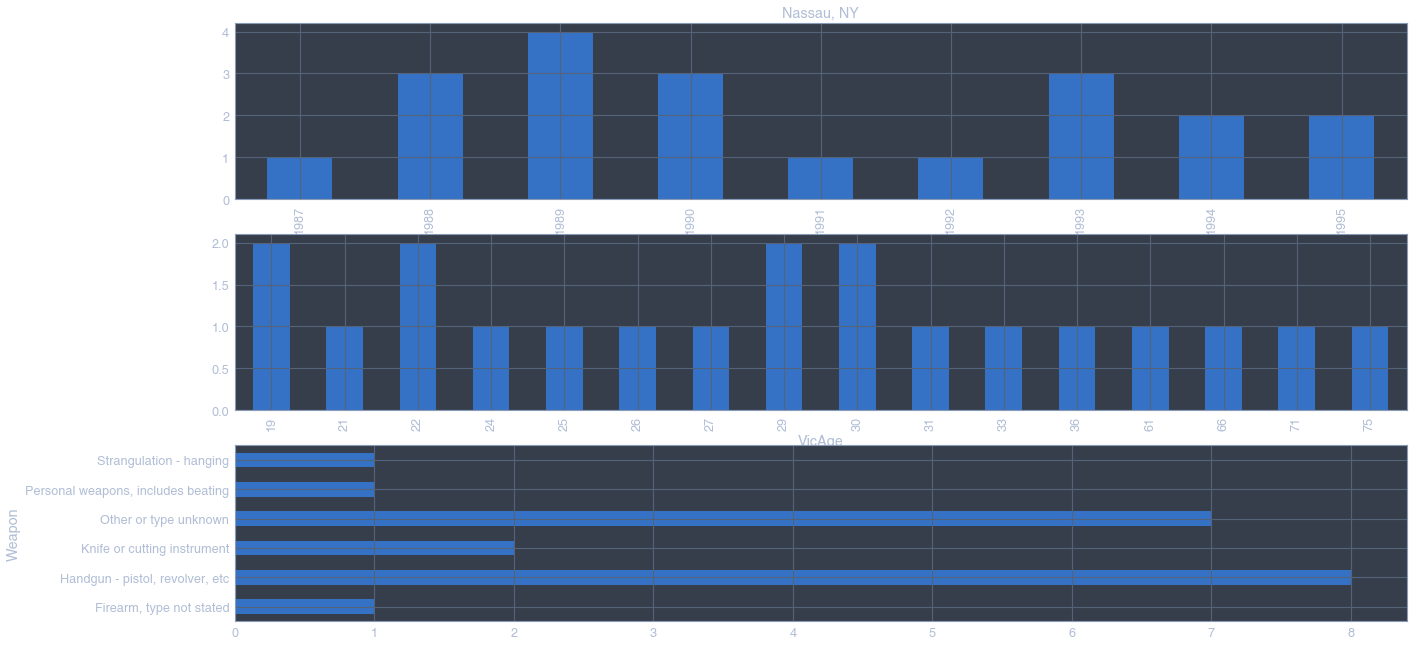

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(21, 11))

nassau.groupby('Year').count()['Ori'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Nassau, NY')

nassau.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[1])
nassau.groupby('Weapon').count()['Ori'].plot(kind='barh', ax=ax[2])


<AxesSubplot:ylabel='Weapon'>

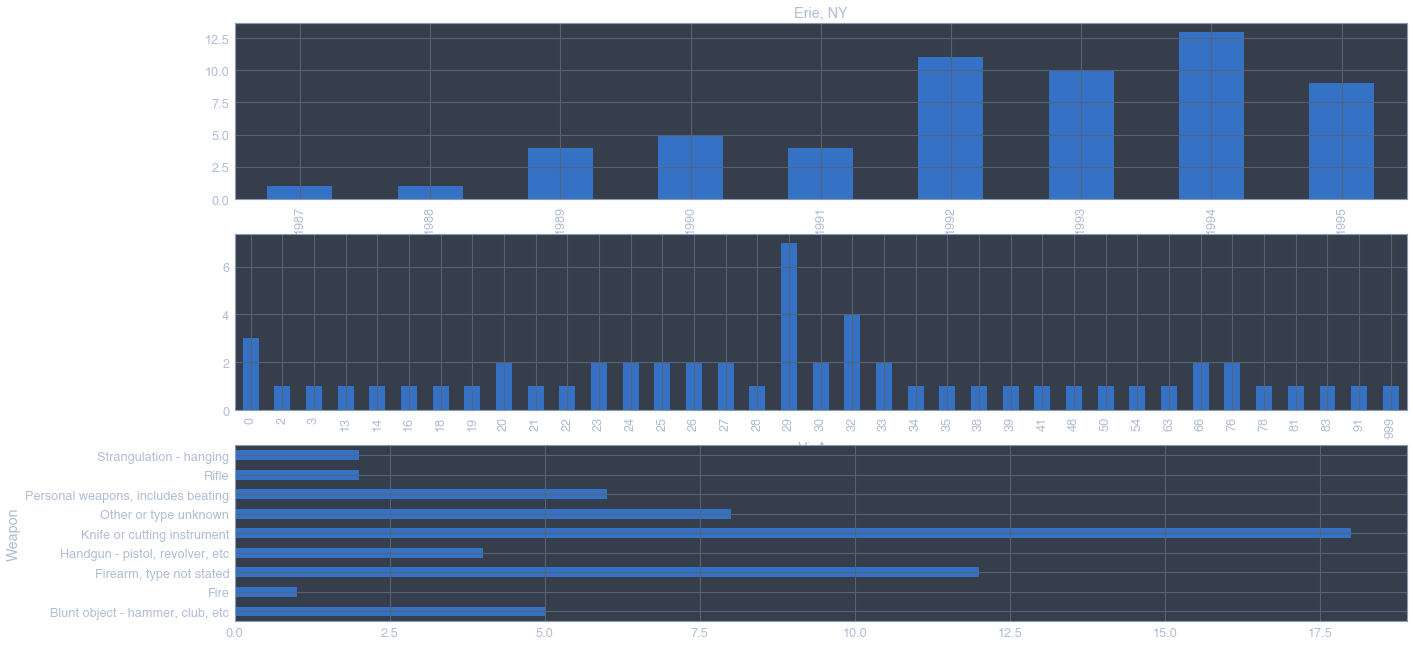

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(21, 11))

erie.groupby('Year').count()['Ori'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Erie, NY')

erie.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[1])
erie.groupby('Weapon').count()['Ori'].plot(kind='barh', ax=ax[2])

<AxesSubplot:ylabel='Weapon'>

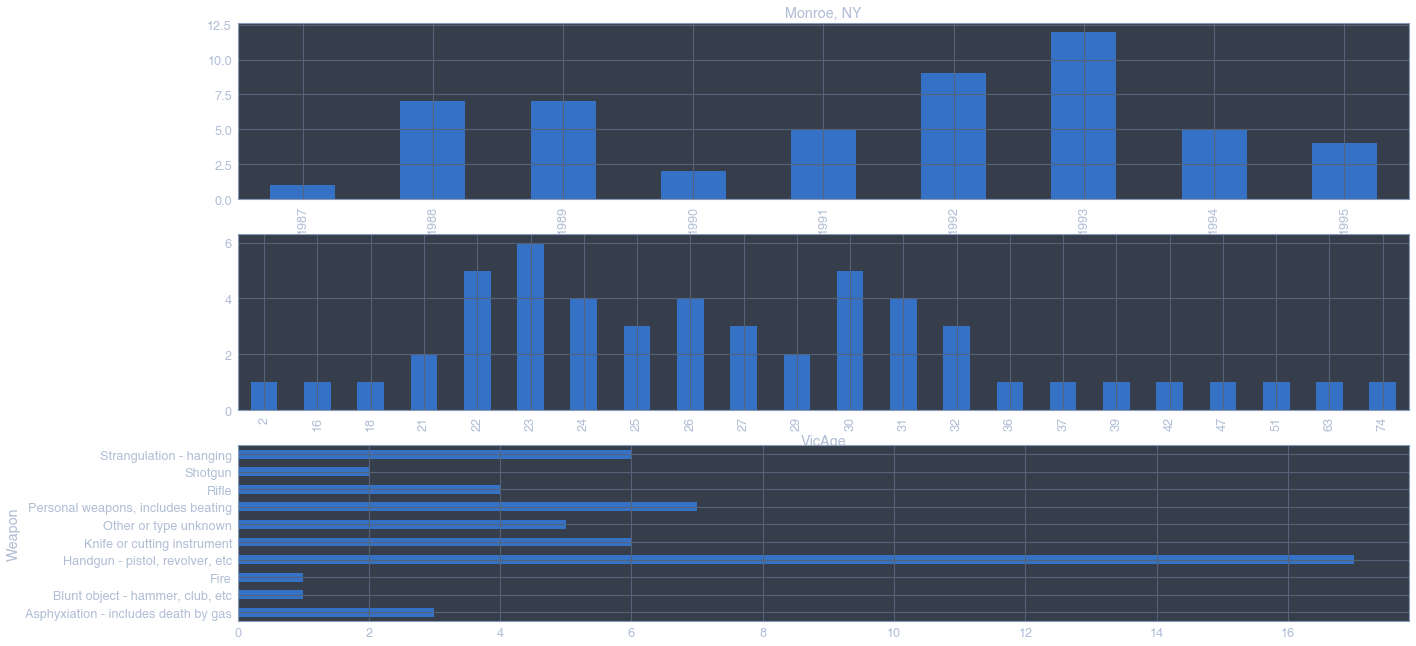

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(21, 11))

monroe.groupby('Year').count()['Ori'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Monroe, NY')

monroe.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[1])
monroe.groupby('Weapon').count()['Ori'].plot(kind='barh', ax=ax[2])

<AxesSubplot:ylabel='Weapon'>

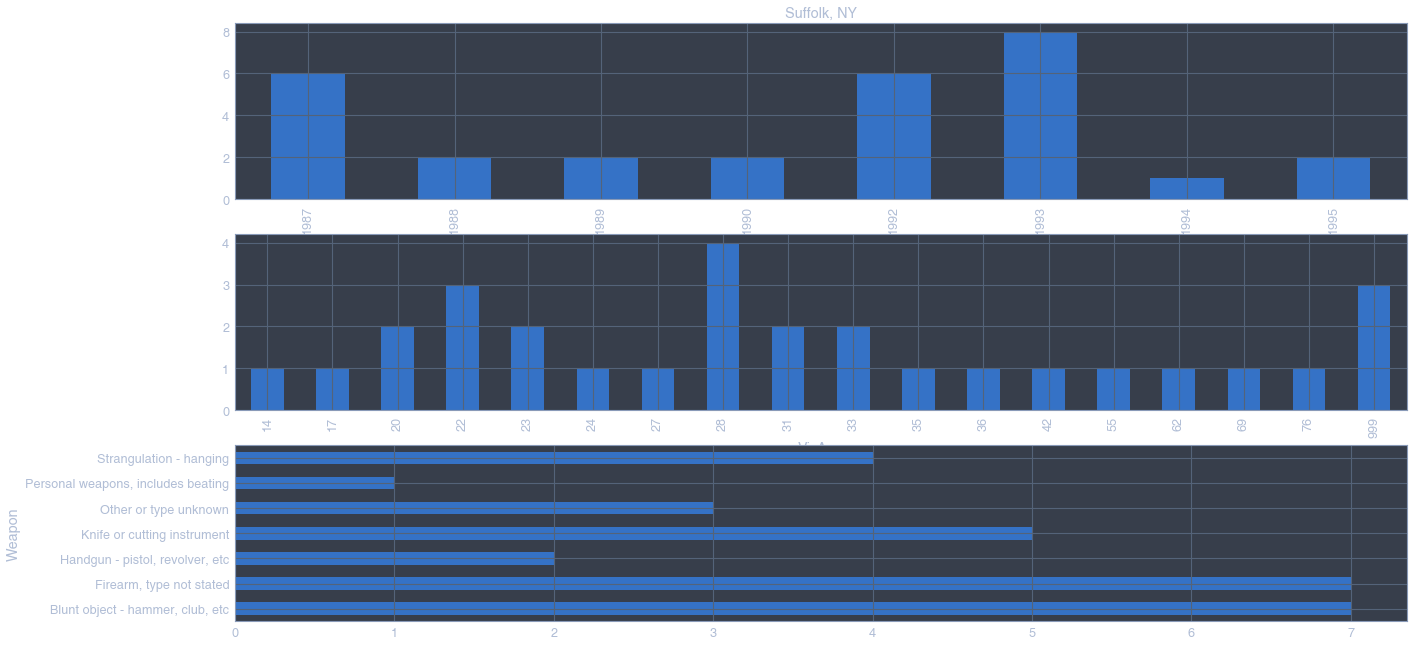

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(21, 11))

suffolk.groupby('Year').count()['Ori'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Suffolk, NY')

suffolk.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[1])
suffolk.groupby('Weapon').count()['Ori'].plot(kind='barh', ax=ax[2])

<AxesSubplot:ylabel='Weapon'>

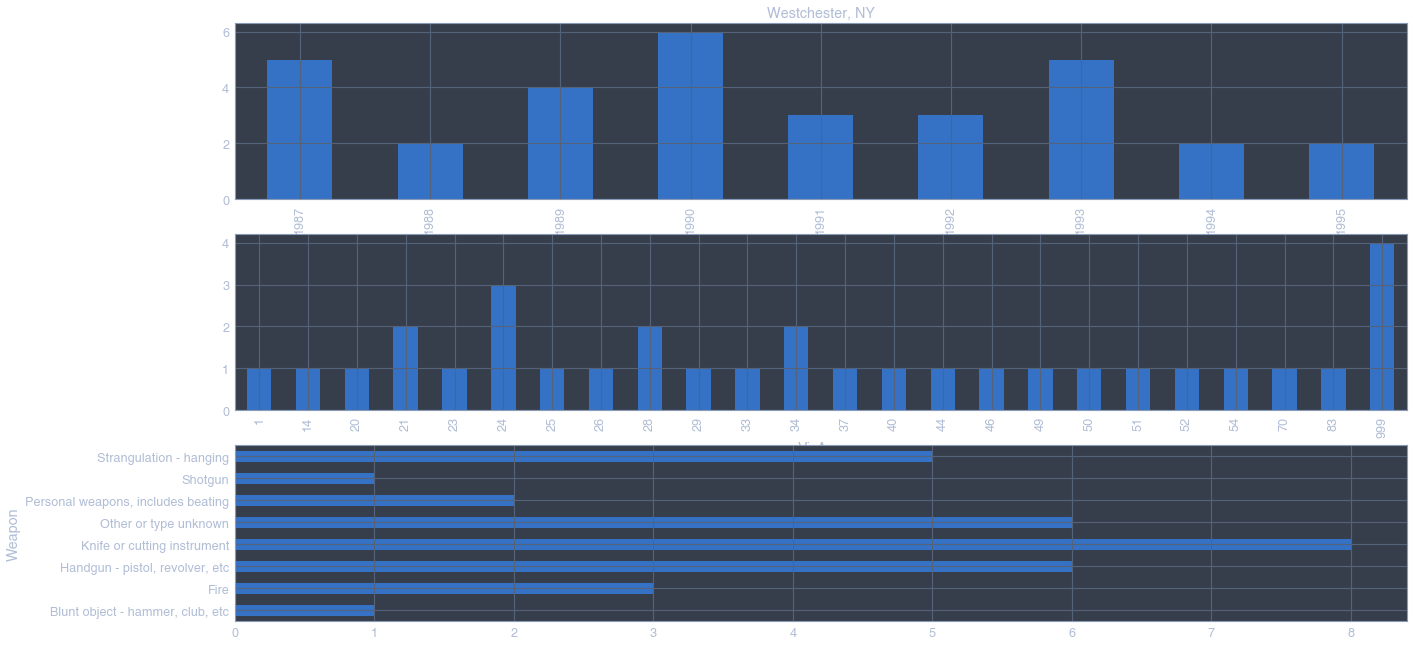

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(21, 11))

westchester.groupby('Year').count()['Ori'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Westchester, NY')

westchester.groupby('VicAge').count()['Ori'].plot(kind='bar', ax=ax[1])
westchester.groupby('Weapon').count()['Ori'].plot(kind='barh', ax=ax[2])

In [28]:
df[(df['Weapon']=='Knife or cutting instrument')
  & (df['CNTYFIPS'].isin(['Erie, NY', 'Westchester, NY']))].groupby(['VicRace']).count()['Ori']

VicRace
Asian       1
Black      18
Unknown     1
White       6
Name: Ori, dtype: int64

In [32]:
df[(df['Weapon']=='Knife or cutting instrument')
  & (df['CNTYFIPS'].isin(['Erie, NY', 'Westchester, NY']))
  & (df['VicRace']=='Black')].groupby('VicAge').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicAge,,,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
23,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
27,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
28,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
29,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
30,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
32,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
